In [54]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [55]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 590


In [56]:
# base Url
url = "https://api.openweathermap.org/data/2.5/weather"
## Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")
# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    city_url = f"{url}?q={city}&appid={weather_api_key}"

    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
         # Parse the JSON and retrieve data
        city_weather = city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | port-aux-francais
Processing Record 2 of Set 1 | queenstown
Processing Record 3 of Set 1 | georgetown
Processing Record 4 of Set 1 | saudarkrokur
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | tashtyp
Processing Record 7 of Set 1 | jinjiang
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | alta
Processing Record 10 of Set 1 | selfoss
Processing Record 11 of Set 1 | puerto baquerizo moreno
Processing Record 12 of Set 1 | invercargill
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | tiksi
Processing Record 15 of Set 1 | yuncheng
Processing Record 16 of Set 1 | puerto natales
Processing Record 17 of Set 1 | porto novo
Processing Record 18 of Set 1 | port elizabeth
Processing Record 19 of Set 1 | rongelap
Processing Record 20 of Set 1 | saldanha
Processing Record 21 of Set 1 | kazanskoye
Processing Record 22 of Set 1 | kearney
Proces

In [ ]:
city_data_df = pd.DataFrame(city_data)

# Show the record count
print(city_data_df.count())

City          580
Lat           580
Lng           580
Max Temp      580
Humidity      580
Cloudiness    580
Wind Speed    580
Country       580
Date          580
dtype: int64


In [ ]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,afaahiti,-17.7500,-149.2833,298.08,85,100,4.71,PF,1712586949
1,port-aux-francais,-49.3500,70.2167,279.96,86,41,12.63,TF,1712586903
2,holualoa,19.6228,-155.9522,294.06,83,100,3.60,US,1712586771
3,albany,42.6001,-73.9662,285.52,52,79,0.89,US,1712586385
4,iqaluit,63.7506,-68.5145,257.00,65,20,9.77,CA,1712586612


In [ ]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [ ]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,298.08,85,100,4.71,PF,1712586949
1,port-aux-francais,-49.3500,70.2167,279.96,86,41,12.63,TF,1712586903
2,holualoa,19.6228,-155.9522,294.06,83,100,3.60,US,1712586771
3,albany,42.6001,-73.9662,285.52,52,79,0.89,US,1712586385
4,iqaluit,63.7506,-68.5145,257.00,65,20,9.77,CA,1712586612


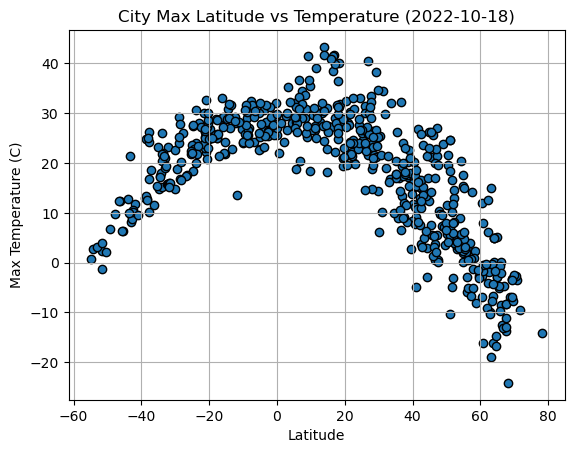

In [ ]:
# Build scatter plot for latitude vs. temperature
city_data_df["Max Temp (C)"] = city_data_df["Max Temp"] - 273.15

plt.scatter(city_data_df["Lat"], city_data_df["Max Temp (C)"], edgecolors= "black")

# Incorporate the other graph properties
plt.grid(True)
plt.title("City Max Latitude vs Temperature (2022-10-18)")
plt.ylabel("Max Temperature (C)")
plt.xlabel("Latitude")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

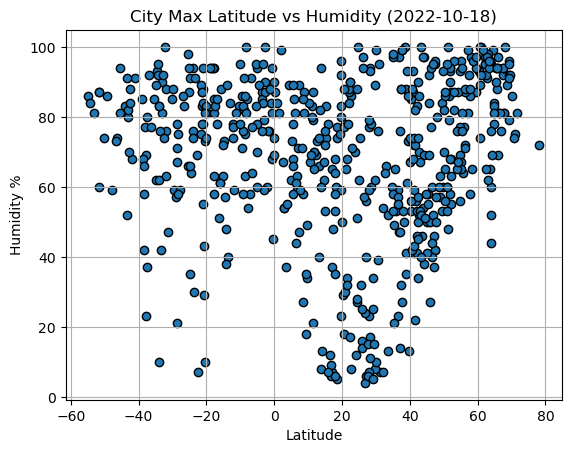

In [ ]:
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolors= "black")
# labels
plt.grid(True)
plt.title("City Max Latitude vs Humidity (2022-10-18)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

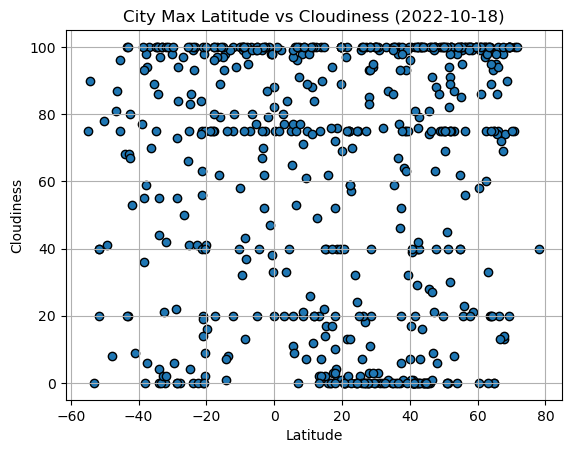

In [ ]:
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolors= "black")
# labels
plt.grid(True)
plt.title("City Max Latitude vs Cloudiness (2022-10-18)")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

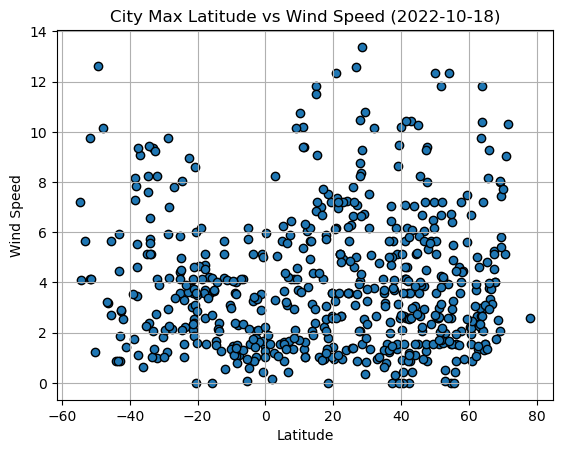

In [ ]:
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolors= "black")
# labels
plt.grid(True)
plt.title("City Max Latitude vs Wind Speed (2022-10-18)")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

In [ ]:
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

In [ ]:
northern_df = city_data_df[city_data_df["Lat"] >= 0]
southern_df = city_data_df[city_data_df["Lat"] < 0]

In [ ]:
northern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
2,holualoa,19.6228,-155.9522,294.06,83,100,3.60,US,1712586771,20.91
3,albany,42.6001,-73.9662,285.52,52,79,0.89,US,1712586385,12.37
4,iqaluit,63.7506,-68.5145,257.00,65,20,9.77,CA,1712586612,-16.15
5,kidal,18.4411,1.4078,313.30,5,76,7.54,ML,1712586951,40.15
7,utrik,11.2278,169.8474,299.77,83,88,10.20,MH,1712586952,26.62


In [ ]:
southern_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date,Max Temp (C)
City_ID,,,,,,,,,,
0,afaahiti,-17.7500,-149.2833,298.08,85,100,4.71,PF,1712586949,24.93
1,port-aux-francais,-49.3500,70.2167,279.96,86,41,12.63,TF,1712586903,6.81
6,west island,-12.1568,96.8225,301.14,78,75,5.66,CC,1712586952,27.99
10,san antonio de pale,-1.4014,5.6325,300.82,76,100,3.54,GQ,1712586953,27.67
12,flying fish cove,-10.4217,105.6791,299.97,83,40,3.09,CX,1712586955,26.82


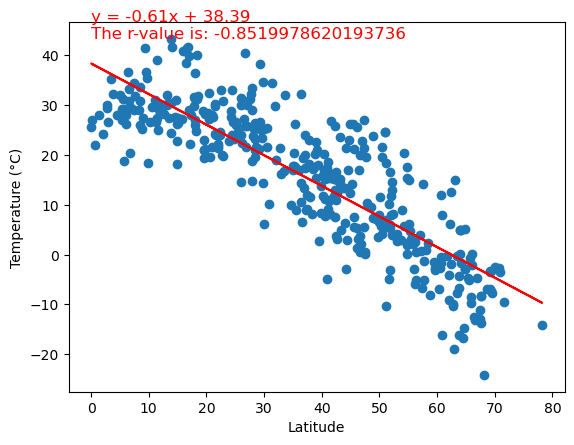

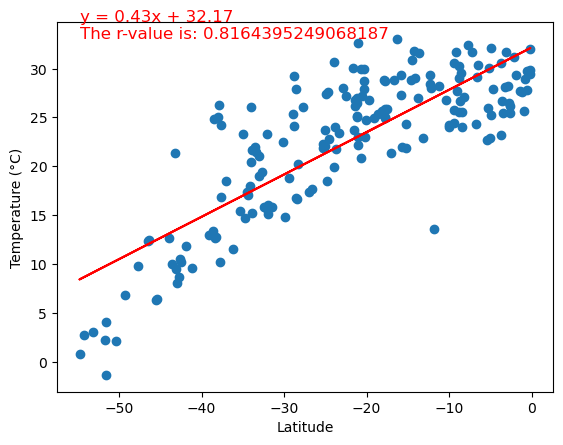

In [ ]:

# defining
def plot_linear_regression(x_values, y_values, xlabel, ylabel, hemisphere):
    #line regress
    slope, intercept, r_value, pvalue, stderr = linregress(x_values, y_values)
    
    
    regress_values = x_values * slope + intercept
    
    # Plot the data points
    plt.scatter(x_values, y_values)
    
    # Plot the regression line
    plt.plot(x_values, regress_values, "r-")
    
    # Label the plot
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # r value
    r_squared = f"The r-value is: {r_value}"
    
    # Annotate the plot with the equation of the regression line
    line_equation = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.annotate(f"{line_equation}\n{r_squared}", (x_values.min(), y_values.max()), fontsize=12, color="red")
    
    # Show plot
    plt.show()



# Really struggling to get the line equation to show up in the right spot
plot_linear_regression(northern_df["Lat"], northern_df["Max Temp (C)"], "Latitude", "Temperature (°C)", "Northern")
plot_linear_regression(southern_df["Lat"], southern_df["Max Temp (C)"], "Latitude", "Temperature (°C)", "Southern")
# r value on the graph instead of on top of each. 

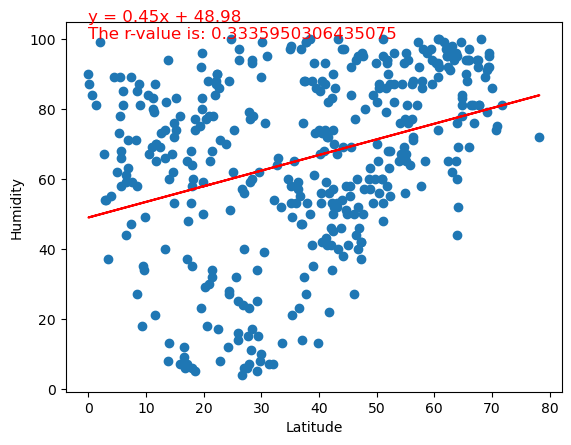

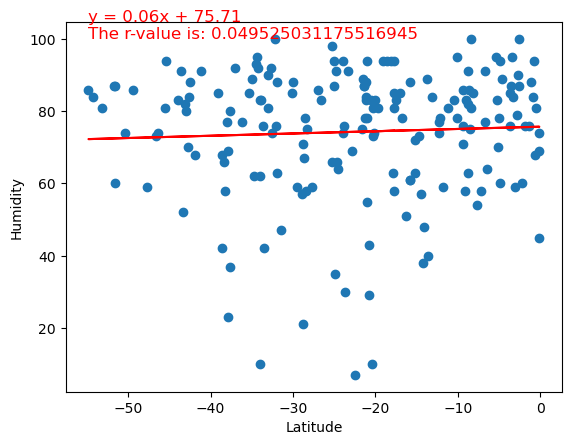

In [ ]:
plot_linear_regression(northern_df["Lat"], northern_df["Humidity"], "Latitude", "Humidity", "Northern")
plot_linear_regression(southern_df["Lat"], southern_df["Humidity"], "Latitude", "Humidity", "Southern")

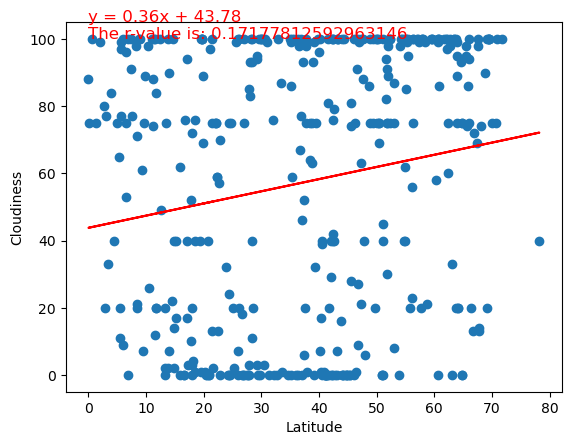

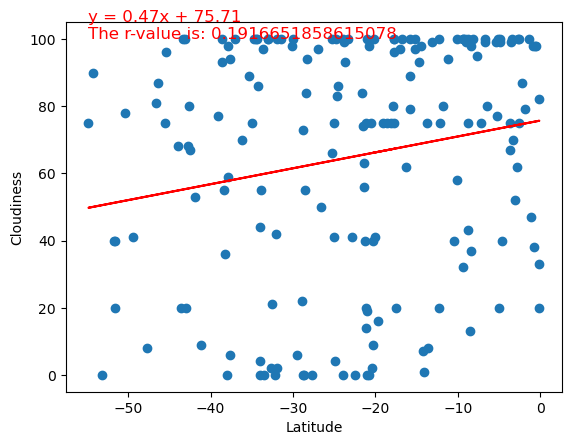

In [ ]:
plot_linear_regression(northern_df["Lat"], northern_df["Cloudiness"], "Latitude", "Cloudiness", "Northern")
plot_linear_regression(southern_df["Lat"], southern_df["Cloudiness"], "Latitude", "Cloudiness", "Southern")

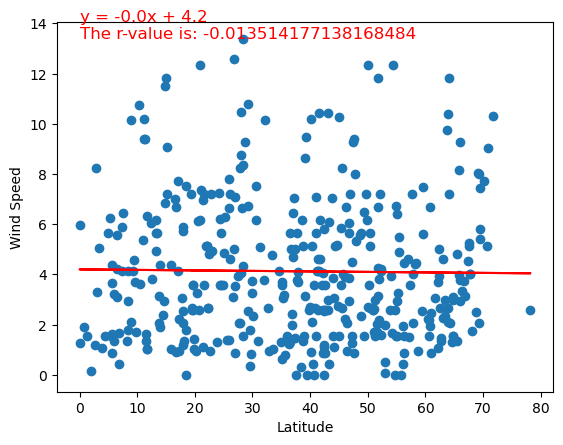

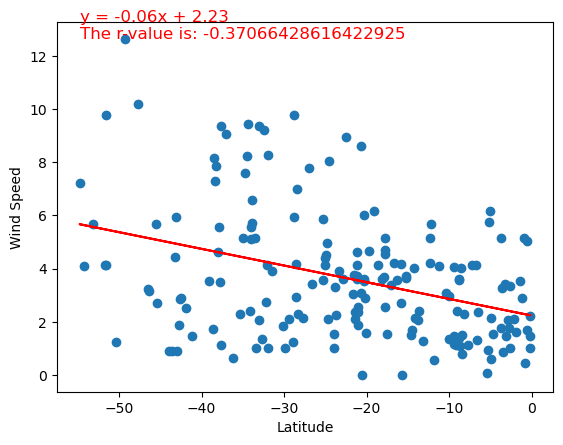

In [ ]:
plot_linear_regression(northern_df["Lat"], northern_df["Wind Speed"], "Latitude", "Wind Speed", "Northern")
plot_linear_regression(southern_df["Lat"], southern_df["Wind Speed"], "Latitude", "Wind Speed", "Southern")

Linear Relationship

We have a negative relationship between wind speed and latitude. As latitude increase the wind speed becomes lower. As we get further from the equator cloudiness actually increases as well. 

Another takeaway is that temperature is highly correlated with latitude. As we approach the equator the temperature is the highest which makes sense. 